# Data exploration 

This notebooks contains data exploration for the project " Predicting lung cancer survival time "

In [9]:
from utils import *
import matplotlib.pyplot as plt
import numpy as np 

## Clinical data and radiomics

Lets first take a look at the tabular data we are given.

Clinical data refers to basic information about each patient like age, type of tumor etc...

Radiomics contains 53 features extracted from radiographic medical images that describe the tumor 

In [3]:
x, y = load_train_dataset()

In [4]:
print(x.shape)
x.head()

(300, 59)


Histology  Mstage  Nstage SourceDataset  Tstage  \
PatientID                                                                  
202                 Adenocarcinoma       0       0            l2       2   
371                     large cell       0       2            l1       4   
246        squamous cell carcinoma       0       3            l1       2   
240                            nos       0       2            l1       3   
284        squamous cell carcinoma       0       3            l1       4   

               age  original_shape_Compactness1  original_shape_Compactness2  \
PatientID                                                                      
202        66.0000                     0.027815                     0.274892   
371        64.5722                     0.023015                     0.188210   
246        66.0452                     0.027348                     0.265740   
240        59.3566                     0.026811                     0.255406   
284        71.0554                     0.023691                     0.199424   

           original_shape_Maximum3DDiameter  \
PatientID                                     
202                               48.559242   
371                               75.703368   
246                               70.434367   
240                               46.818800   
284                               53.795911   

           original_shape_SphericalDisproportion  ...  \
PatientID                                         ...   
202                                     1.537964  ...   
371                                     1.744961  ...   
246                                     1.555420  ...   
240                                     1.576120  ...   
284                                     1.711620  ...   

           original_glrlm_LongRunEmphasis  \
PatientID                                   
202                              1.457980   
371                              2.512125   
246                              4.096838   
240                              1.824328   
284                              2.652580   

           original_glrlm_GrayLevelNonUniformity  \
PatientID                                          
202                                   555.378594   
371                                  1766.619373   
246                                  3462.816344   
240                                   683.869792   
284                                   962.094760   

           original_glrlm_RunLengthNonUniformity  \
PatientID                                          
202                                 14592.303727   
371                                 22881.932686   
246                                 18773.106002   
240                                  7978.285176   
284                                  7520.054910   

           original_glrlm_RunPercentage  \
PatientID                                 
202                            0.891330   
371                            0.766032   
246                            0.644554   
240                            0.828138   
284                            0.734898   

           original_glrlm_LowGrayLevelRunEmphasis  \
PatientID                                           
202                                      0.003562   
371                                      0.002246   
246                                      0.001880   
240                                      0.002855   
284                                      0.006710   

           original_glrlm_HighGrayLevelRunEmphasis  \
PatientID                                            
202                                     954.749135   
371                                    1092.823724   
246                                     878.989601   
240                                     907.045929   
284                                    1513.420445   

           original_glrlm_ShortRunLowGrayLevelEmphasis  \
PatientID                                   

In [5]:
x.describe()

Mstage      Nstage      Tstage         age  \
count  300.000000  300.000000  300.000000  284.000000   
mean     0.040000    0.963333    2.103333   68.766856   
std      0.314212    1.160378    1.072297    9.587605   
min      0.000000    0.000000    1.000000   42.513300   
25%      0.000000    0.000000    1.000000   62.979625   
50%      0.000000    0.000000    2.000000   69.947300   
75%      0.000000    2.000000    3.000000   76.201950   
max      3.000000    3.000000    5.000000   87.126600   

       original_shape_Compactness1  original_shape_Compactness2  \
count                   300.000000                   300.000000   
mean                      0.026078                     0.255309   
std                       0.006213                     0.114462   
min                       0.009288                     0.030648   
25%                       0.022028                     0.172413   
50%                       0.026071                     0.241503   
75%                       0.030600                     0.332701   
max                       0.042759                     0.649631   

       original_shape_Maximum3DDiameter  \
count                        300.000000   
mean                          63.735090   
std                           35.533323   
min                           13.453624   
25%                           33.915016   
50%                           57.823002   
75%                           82.933158   
max                          216.716405   

       original_shape_SphericalDisproportion  original_shape_Sphericity  \
count                             300.000000                 300.000000   
mean                                1.666887                   0.618682   
std                                 0.321580                   0.101082   
min                                 1.154634                   0.312946   
25%                                 1.443163                   0.556575   
50%                                 1.605803                   0.622741   
75%                                 1.796703                   0.692923   
max                                 3.195442                   0.866075   

       original_shape_SurfaceArea  ...  original_glrlm_LongRunEmphasis  \
count                  300.000000  ...                      300.000000   
mean                 10269.274116  ...                        2.997984   
std                  11020.943961  ...                        2.277218   
min                    409.699505  ...                        1.129743   
25%                   2187.199167  ...                        1.380404   
50%                   5669.467145  ...                        2.183706   
75%                  14084.942660  ...                        3.928845   
max                  67799.783468  ...                       19.569205   

       original_glrlm_GrayLevelNonUniformity  \
count                             300.000000   
mean                             4028.912972   
std                              7354.203503   
min                                20.662759   
25%                               179.737494   
50%                               891.648859   
75%                              4138.067422   
max                             61727.567864   

       original_glrlm_RunLengthNonUniformity  original_glrlm_RunPercentage  \
count                             300.000000                    300.000000   
mean                            21708.293730                      0.770259   
std                             30741.811717                      0.139863   
min                               503.361305                      0.420690   
25%                              3594.097996                      0.653939   
50%                             10812.628268                      0.793196   
75%                             28318.086695                      0.903259   
max                            267812.272378                      0.960043   

       original_glrlm_LowG

We have many features with different types (categorical and continuous) and not many samples (ony 300). We expect to have to deal with overfitting. 

We can see that some features are missing for some of the samples (like age). We cant take the risk to remove these samples entirely so we could fill these nan values with the mean of the features. 

In [6]:
y.head()

SurvivalTime  Event
PatientID                     
202                1378      0
371                 379      1
246                 573      1
240                 959      0
284                2119      0

As described in the challenge, the target contains for each patient the survival time in days and the event which represents the censorship (1=event observed is death, 0=event observed is the last time patient was seen alive, the patient then escaped the study)

## Images

For each patient, we have one scan and one mask that are cropped and centered around the tumor region. Those crops are of fixed 92x92x92 size. 

In [11]:
working_dir = %pwd
data_path = working_dir.replace('/notebooks', '/challenge_files')
train_images_path = f'{data_path}/x_train/images'

(92, 92, 92)


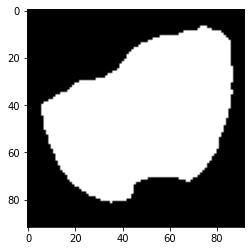

In [12]:
archive = np.load(f'{train_images_path}/patient_002.npz')
scan = archive['scan']
mask = archive['mask']
print(scan.shape)
plt.figure()
plt.imshow(scan[:,:,46], cmap="gray")

plt.figure()
plt.imshow(mask[:,:,46], cmap="gray")